<a href="https://colab.research.google.com/github/suraj-75/laughing-train/blob/main/Click_on_Add_Pred_using_Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

data = pd.read_csv("/content/Social_Network_Ads.csv")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [20]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


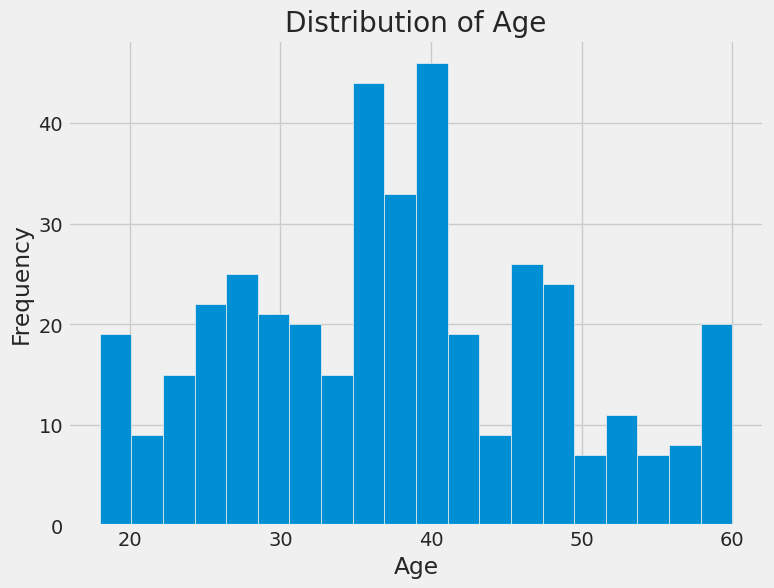

In [21]:
plt.figure(figsize=(8,6))
data.Age.hist(bins=20) # Use a fixed number of bins
plt.xlabel("Age")
plt.ylabel("Frequency") # Add a label for clarity
plt.title("Distribution of Age") # Add a title
plt.show() # Explicitly show the plot

<Figure size 800x600 with 0 Axes>

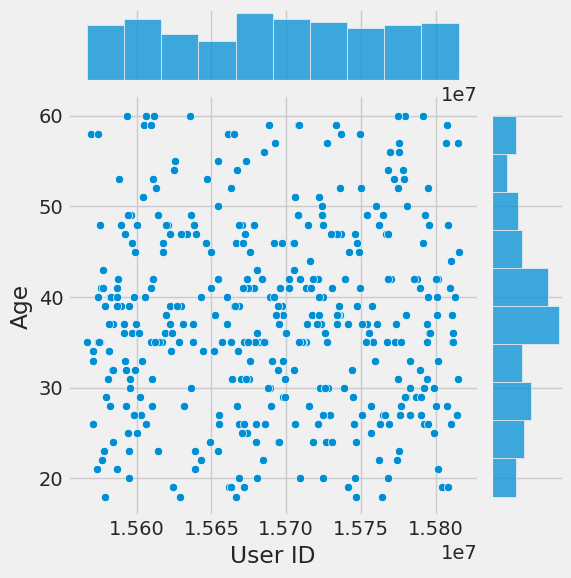

In [22]:
plt.figure(figsize=(8,6))
sns.jointplot(x = data['User ID'], y = data.Age)

<Figure size 800x600 with 0 Axes>

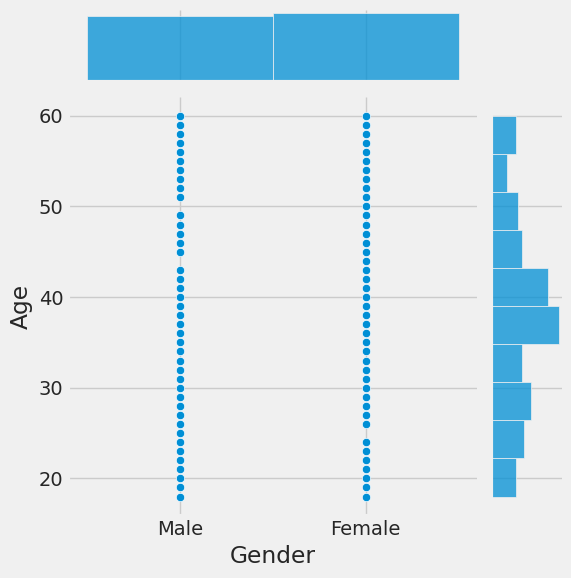

In [23]:
plt.figure(figsize=(8,6))
sns.jointplot(x = data.Gender, y = data.Age)

<Figure size 800x600 with 0 Axes>

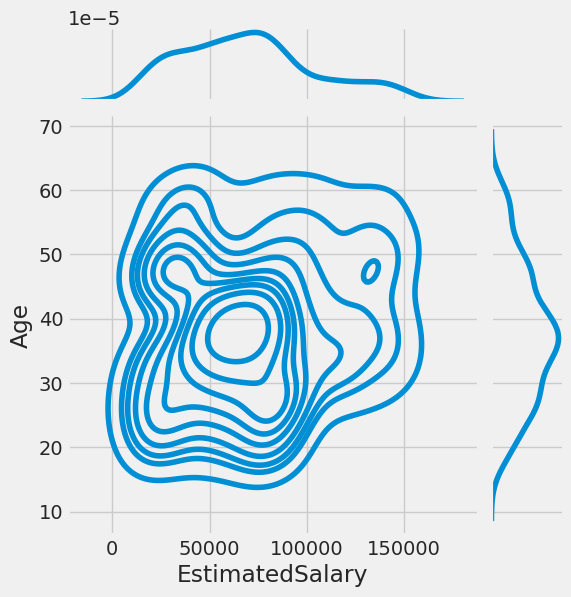

In [24]:
plt.figure(figsize=(8,6))
sns.jointplot(x = data["EstimatedSalary"], y = data.Age, kind='kde')

<Figure size 800x600 with 0 Axes>

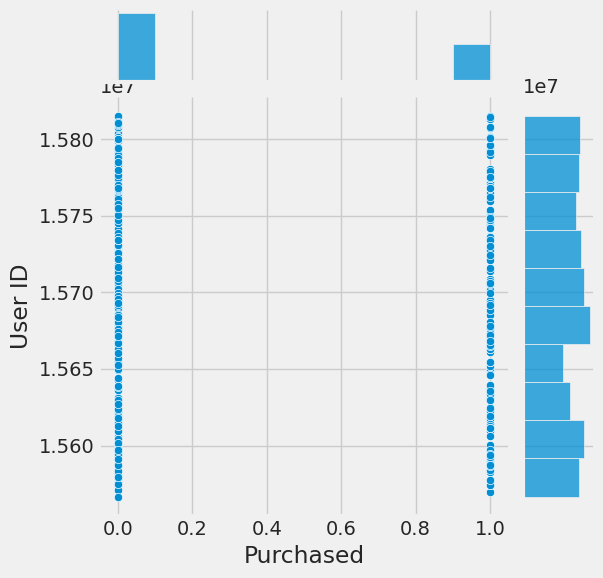

In [25]:
plt.figure(figsize=(8,6))
sns.jointplot(x = data["Purchased"], y = data["User ID"])

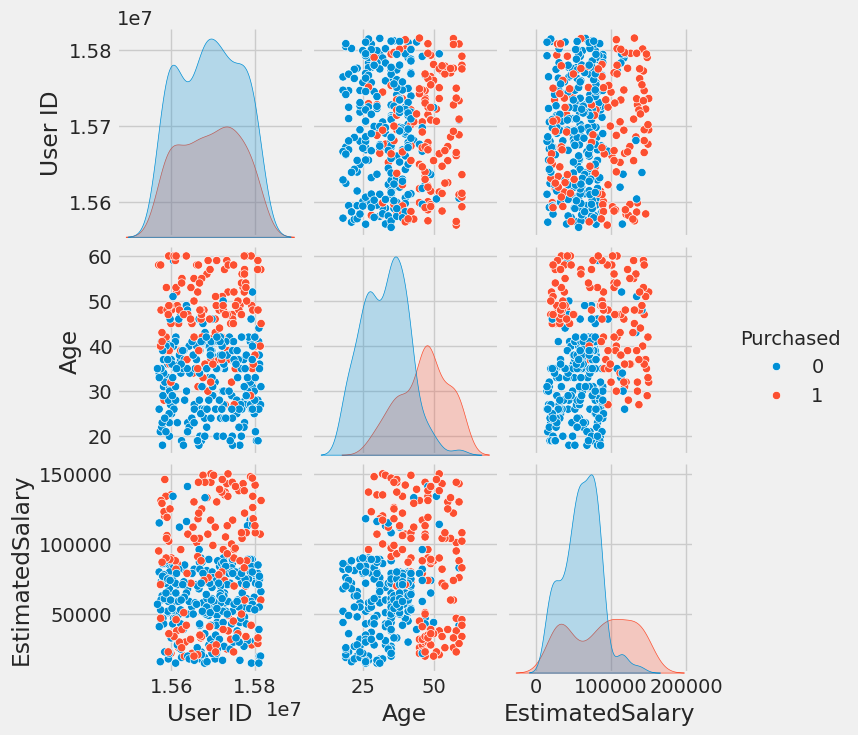

In [26]:
sns.pairplot(data, hue="Purchased")

In [27]:
data['Purchased'].value_counts()

,count
Purchased,
0,257
1,143


<Axes: >

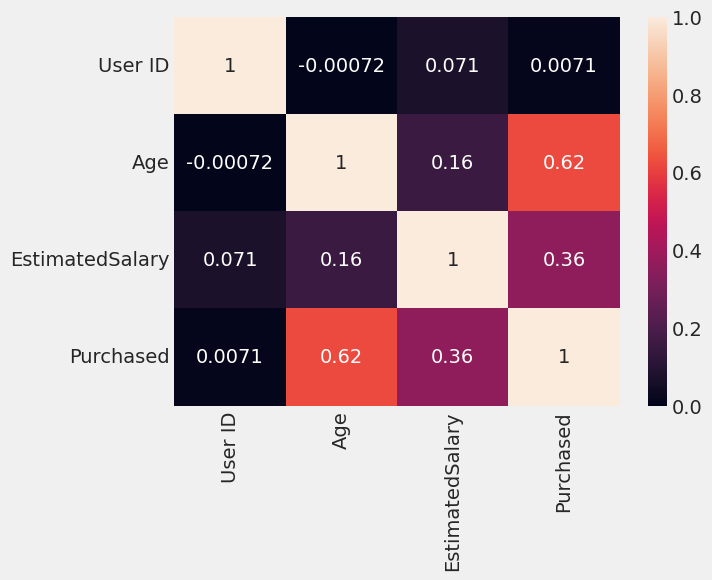

In [28]:
sns.heatmap(data.drop("Gender", axis = 1).corr(), annot = True)

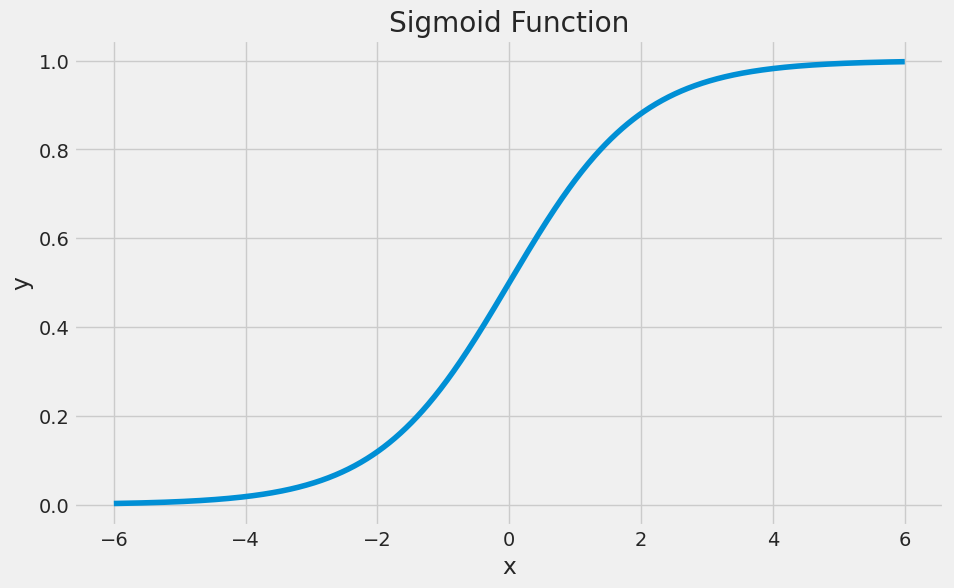

In [29]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize=(10,6))
plt.plot(x, (1/(1 + np.exp(-x))))
plt.xlabel("x")
plt.ylabel("y")
plt.title("Sigmoid Function")
plt.show()

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def print_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
      pred = clf.predict(X_train)
      clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
      print("Train Result:\n================================================")
      print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
      print("_______________________________________________")
      print(f"CLASSIFICATION REPORT:\n{clf_report}")
      print("_______________________________________________")
      print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
      pred = clf.predict(X_test)
      clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
      print("Test Result:\n================================================") # Changed to Test Result
      print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
      print("_______________________________________________")
      print(f"CLASSIFICATION REPORT:\n{clf_report}")
      print("_______________________________________________")
      print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.impute import SimpleImputer

X_train = data.drop(["Gender"], axis = 1)
y_train = data["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

num_columns = ["User ID", "Age", "EstimatedSalary"]

ct = make_column_transformer((MinMaxScaler(), num_columns), (StandardScaler(), num_columns), remainder="passthrough")
X_train = ct.fit_transform(X_train)
X_test = ct.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
print_score(lr, X_train, X_test, y_train, y_test, train=True)
print_score(lr, X_train, X_test, y_train, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    205.0  115.0       1.0      320.0         320.0
_______________________________________________
Confusion Matrix: 
 [[205   0]
 [  0 115]]

Test Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
              0     1  accuracy  macro avg  weighted avg
precision   1.0   1.0       1.0        1.0           1.0
recall      1.0   1.0       1.0        1.0           1.0
f1-score    1.0   1.0       1.0        1.0           1.0
support    52.0  28.0       1.0       80.0          80.0
_______________________________________________
Confusion Matrix: 
 [[52  0]
 [ 0 28]]



In [33]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, lr.predict(X_test))
print(f"ROC AUC Score: {ROC_AUC:.2f}")

ROC AUC Score: 1.00


**ROC AUC of our model is equal to 1. So, we can conclude that our classifier does a good job in classifying the pulsar star**.

**So we can conclude that our classifier does a good job in classifying the Click on Add Audience**.